# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
learning_rate = 0.01
training_steps = 1000

In [ ]:
X = np.random.randn(50)
Y = 2*X + np.random.randn(50)

In [ ]:
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

def linear_regression(X):
  return W*X + b

def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred- y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
def run_optimization():
  with tf.GradientTape() as tape:
    pred = linear_regression(X)
    loss = mean_square(pred,Y)
  
  gradients = tape.gradient(loss, [W,b])
  optimizer.apply_gradients(zip(gradients,[W,b]))

In [ ]:
for step in range(1,training_steps + 1):
  run_optimization()

  if step % 50 == 0:
    pred = linear_regression(X)
    loss = mean_square(pred,Y)
    print('step: {:4d}\t loss: {:.4f}\t W: {:.4f}\t b: {:.4f}'.format(step,loss,W.numpy(),b.numpy()))

step:   50	 loss: 1.5032	 W: 1.5423	 b: 0.6214
step:  100	 loss: 0.7895	 W: 1.8756	 b: 0.1863
step:  150	 loss: 0.7535	 W: 1.9095	 b: 0.0652
step:  200	 loss: 0.7493	 W: 1.9002	 b: 0.0217
step:  250	 loss: 0.7483	 W: 1.8900	 b: 0.0025
step:  300	 loss: 0.7481	 W: 1.8835	 b: -0.0070
step:  350	 loss: 0.7480	 W: 1.8799	 b: -0.0119
step:  400	 loss: 0.7480	 W: 1.8779	 b: -0.0145
step:  450	 loss: 0.7480	 W: 1.8769	 b: -0.0159
step:  500	 loss: 0.7480	 W: 1.8763	 b: -0.0166
step:  550	 loss: 0.7480	 W: 1.8760	 b: -0.0170
step:  600	 loss: 0.7480	 W: 1.8759	 b: -0.0172
step:  650	 loss: 0.7480	 W: 1.8758	 b: -0.0174
step:  700	 loss: 0.7480	 W: 1.8757	 b: -0.0174
step:  750	 loss: 0.7480	 W: 1.8757	 b: -0.0174
step:  800	 loss: 0.7480	 W: 1.8757	 b: -0.0175
step:  850	 loss: 0.7480	 W: 1.8757	 b: -0.0175
step:  900	 loss: 0.7480	 W: 1.8757	 b: -0.0175
step:  950	 loss: 0.7480	 W: 1.8757	 b: -0.0175
step: 1000	 loss: 0.7480	 W: 1.8757	 b: -0.0175


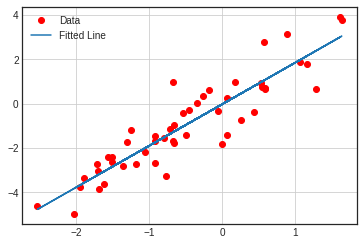

In [ ]:
plt.plot(X,Y,'ro', label='Data')
plt.plot(X, np.array(W * X + b), label='Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [ ]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [ ]:
epochs = 1000
learning_rate = 0.04

### 변수 지정

In [ ]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [ ]:
print(a)
print(a.numpy())
print(b.numpy())
print(c.numpy())

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.21060432>
0.21060432
0.2429997
-0.75841254


### 데이터 지정

In [4]:
X = np.random.randn(50)
Y = X**2 + X*np.random.randn(50)

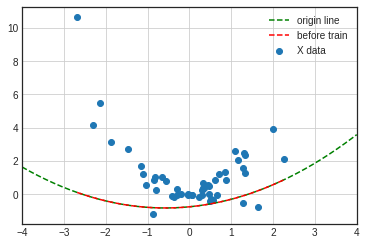

In [ ]:
line_x = np.arange(min(X),max(X),0.001)
line_y = a*line_x**3 + b*line_x + c
x_ = np.arange(-4.0,4.0,0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X,Y,label='X data')
plt.plot(x_,y_,'g--', label = 'origin line')
plt.plot(line_x, line_y, 'r--',label = 'before train')
plt.xlim(-4.0,4.0)
plt.legend()
plt.grid()
plt.show()

### Util Functions

In [ ]:
def compute_loss():
  pred_y = a*(np.array(X)**2) + b*np.array(X) + c
  loss = tf.reduce_mean((Y - pred_y)**2)
  return loss

### Optimizer

In [ ]:
optimizer = Adam(learning_rate=learning_rate)

### 학습

In [ ]:
for epoch in range(1,epochs+1,1):
  optimizer.minimize(compute_loss, var_list=[a,b,c])
  if epoch % 100 == 0:
    print('epoch: {:4d}\ta:{:4f}\tb: {:.4f}\tc:{:.4f}'.format(epoch,a.numpy(),b.numpy(),c.numpy()))

epoch:  100	a:0.957444	b: -0.3432	c:0.0097
epoch:  200	a:0.956728	b: -0.3498	c:0.0081
epoch:  300	a:0.956731	b: -0.3498	c:0.0081
epoch:  400	a:0.956731	b: -0.3498	c:0.0081
epoch:  500	a:0.956731	b: -0.3498	c:0.0081
epoch:  600	a:0.956731	b: -0.3498	c:0.0081
epoch:  700	a:0.956731	b: -0.3498	c:0.0081
epoch:  800	a:0.956731	b: -0.3498	c:0.0081
epoch:  900	a:0.956731	b: -0.3498	c:0.0081
epoch: 1000	a:0.956731	b: -0.3498	c:0.0081


### 학습 후의 회귀선

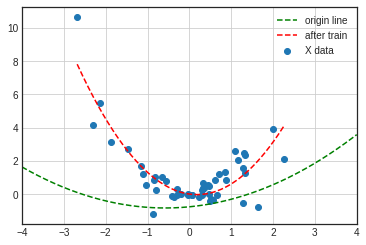

In [ ]:
line_x = np.arange(min(X),max(X),0.001)
line_y = a*line_x**2 + b*line_x + c

plt.scatter(X,Y,label='X data')
plt.plot(x_,y_,'g--', label = 'origin line')
plt.plot(line_x, line_y, 'r--',label = 'after train')
plt.xlim(-4.0,4.0)
plt.legend()
plt.grid()
plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [ ]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [ ]:
num_classes = 10
num_features = 784

learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1,num_features])
x_train, x_test = x_train / 255., x_test / 255.

### tf.data API 사용
- 03 에서 다시 다룸 

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 변수 지정

In [ ]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name = 'weight')
b = tf.Variable(tf.zeros([num_classes]), name = 'bias')

### Util Functions

In [ ]:
def logistic_regressing(x):
  return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):
  true_y = tf.one_hot(true_y, depth=num_classes)
  pred_y = tf.clip_by_value(pred_y, 1e-9, 1.)

  return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizer

In [ ]:
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
def run_optimization(x, y):
  with tf.GradientTape() as tape:
    pred = logistic_regressing(x)
    loss = cross_entropy(pred,y)
  
  gradients = tape.gradient(loss, [W,b])
  optimizer.apply_gradients(zip(gradients,[W,b]))

### 학습 진행

In [ ]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps),1):
  run_optimization(batch_x, batch_y)

  if step % 50 == 0:
    pred = logistic_regressing(batch_x)
    loss = cross_entropy(pred, batch_y)
    acc = accuracy(pred, batch_y)
    print('step: {:4d}\tloss:{:4f}\taccuracy: {:.4f}'.format(step, loss, acc))

step:   50	loss:6.044993	accuracy: 0.2812
step:  100	loss:3.684333	accuracy: 0.4648
step:  150	loss:3.070493	accuracy: 0.4883
step:  200	loss:1.831187	accuracy: 0.6250
step:  250	loss:1.965239	accuracy: 0.6094
step:  300	loss:1.944654	accuracy: 0.6719
step:  350	loss:1.469025	accuracy: 0.7227
step:  400	loss:1.233393	accuracy: 0.7578
step:  450	loss:1.464603	accuracy: 0.7344
step:  500	loss:1.427686	accuracy: 0.7461
step:  550	loss:1.735331	accuracy: 0.7109
step:  600	loss:1.345175	accuracy: 0.7617
step:  650	loss:1.191111	accuracy: 0.7461
step:  700	loss:0.786378	accuracy: 0.8203
step:  750	loss:1.345435	accuracy: 0.7461
step:  800	loss:1.034546	accuracy: 0.7891
step:  850	loss:1.251236	accuracy: 0.7656
step:  900	loss:1.016851	accuracy: 0.7734
step:  950	loss:0.619675	accuracy: 0.8359
step: 1000	loss:0.759627	accuracy: 0.8281


###  테스트

In [ ]:
pred = logistic_regressing(x_test)
print('Test Accuracy: {}'.format(accuracy(pred, y_test)))

Test Accuracy: 0.8133000135421753


### 시각화

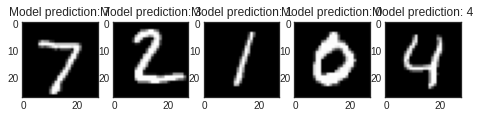

In [ ]:
plt.style.use(['seaborn-white'])
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regressing(test_images)

plt.figure(figsize=(16,8))
for i in range(1, num_images +1, 1):
  plt.subplot(1,num_classes,i)
  plt.imshow(np.reshape(test_images[i-1],[28,28]), cmap='gray')
  plt.title('Model prediction: {}'.format(np.argmax(predictions.numpy()[i-1])))

plt.show()